In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

##############
#For plotting
import matplotlib.cm as cm

from matplotlib import rc
from matplotlib import rcParams
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
#rcParams['text.fontsize'] = 18

sys.path.append("/Users/bsafdi/Dropbox/galacticB/python/")
import galB_models as gB

In [2]:
# Use paper https://academic.oup.com/mnras/article/431/1/683/1050400

B0 = 1. # \muG
Rscale = 20.0 # kpc
hg = 6.0 #kpc
Rmax = 20.0 # kpc

Rmol = 5.0 #kpc
theta_p = -11.5*np.pi/180. #radians

def Br(r):
    return B0*np.exp(-r**2/Rscale**2)

def Bcoh(z):
    return 1/np.cosh(z/hg)**2

def Bhat(x,y):
    r = np.sqrt(x**2+y**2)
    phi = arctanM(y,x)
    if r < Rmol:
        return np.array([np.cos(phi+np.pi/2.),np.sin(phi+np.pi/2.)])
    else:
        r_hat = np.array([np.cos(phi),np.sin(phi)])
        phi_hat = np.array([-np.sin(phi),np.cos(phi)])
        #print r_hat, phi_hat
        return np.sin(theta_p)*r_hat+np.cos(theta_p)*phi_hat
    
def B_ASS(x,y,z):
    r = np.sqrt(x**2+y**2)
    return Br(r)*Bcoh(z)*Bhat(x,y)

######## B_ASS

ais = np.array([3.0,0.5,-4.0,1.2,-0.8])
phi0_is = np.array([10+90*1,10+90*2,10+90*3,10+90*4,10+90*5])*np.pi/180.
Rcomp = 7.1 #kpc
C0 = 2.5
rcc =12.0 #kpc
d0 = 0.3 #kpc
hc = 2.0 #kpc

def arctanM(x,y):
    tmp = np.arctan2(x,y)
    if tmp<0:
        res= 2*np.pi+tmp
    else:
        res = tmp
    return res
        

def Bcomp(z):
    return 1./np.cosh(z/hc)**2

def c(r):
    if r<rcc:
        return C0
    else:
        return C0*(r/rcc)**(-3.)

def d0f(r):
    return d0/(c(r)*Br(r))

def ri(phi,i):
    return 7.1*np.exp((phi-phi0_is[i-1])*np.tan(theta_p))

def di(r,phi,i):
    riA = ri(phi,i)
    return np.abs(r-riA)

def rhoc(x,y,z,d,i):
    r = np.sqrt(x**2+y**2)
    phi = arctanM(y,x)
    rI = ri(phi,i)
    return c(rI)*Bcomp(z)*np.exp(-d**2/d0f(rI)**2)

def Barmi(x,y,z,i):
    r = np.sqrt(x**2+y**2)
    phi = arctanM(y,x)
    
    Bi = Br(r)
    ai = ais[i-1]
    #print ai
    d = di(r,phi,i)
    #print d, d0f(ri(phi,i))
    rhoci = rhoc(x,y,z,d,i)
    #print d, ri(phi,i), rhoci #, d0f(r)
    Bh = Bhat(x,y)
    return Bi*ai*rhoci*Bh

def Barm(x,y,z):
    res = np.zeros(2)
    for i in [1,2,3,4,5]:
        res += Barmi(x,y,z,i)
    return res






In [3]:
Barm(-3,0,0)

array([8.93323528e-92, 4.86302678e-76])

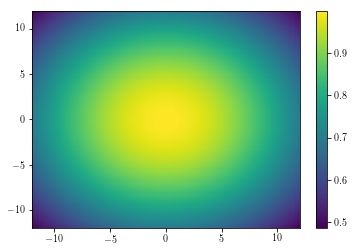

In [4]:
xs = np.linspace(-12,12,200)
ys = np.linspace(-12,12,200)

BsM = np.zeros((len(xs),len(ys)))
BsMS = np.zeros((len(xs),len(ys)))
for i in range(len(xs)):
    for j in range(len(ys)):
        Bt = B_ASS(xs[i],ys[j],0.0)
        Bt2 = Barm(xs[i],ys[j],0.0)
        
        BsM[i,j] = np.sqrt(Bt[0]**2+Bt[1]**2)
        BsMS[i,j] = np.sqrt(Bt2[0]**2+Bt2[1]**2)


X, Y = np.meshgrid(xs, ys)
plt.pcolormesh(X, Y, BsM)
plt.colorbar()

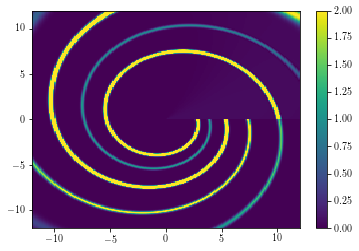

In [219]:
X, Y = np.meshgrid(xs, ys)
plt.pcolormesh(X, Y, (BsMS).T,vmax=2,vmin=0)
plt.colorbar()